In [12]:
%%capture
!wget "https://www.dropbox.com/s/35ithckx6vqryob/Monkeys_Faces_Dataset.tar?dl=0" -O Monkeys_Faces_Dataset.tar  
!tar --warning=no-unknown-keyword -xzf Monkeys_Faces_Dataset.tar

In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
bs = 8  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './Monkeys Faces/'

In [3]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  4 classes:
 ['chimpanzee', 'gibbon', 'gorilla', 'models']


In [4]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: chimpanzee


Class: gibbon


Class: gorilla


Class: models


In [5]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [6]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 10 training images and 2 validation images.


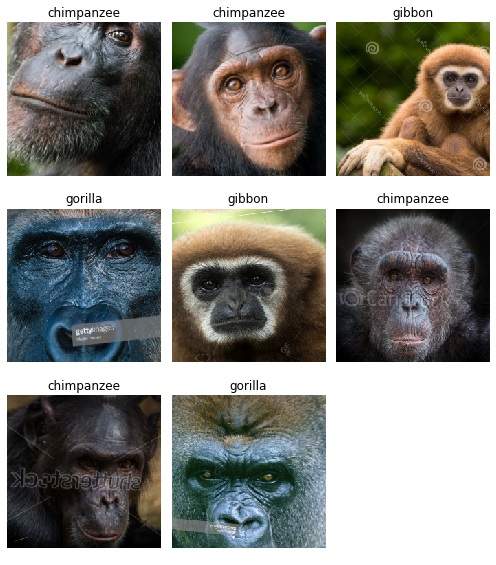

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


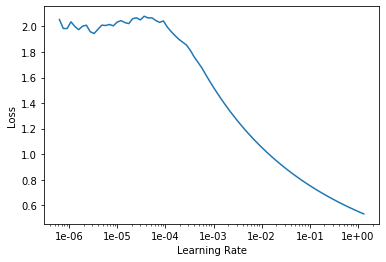

In [9]:
learn.lr_find();
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.194516,5.987226,0.500000,00:20
1,1.786501,0.011728,1.000000,00:22
2,1.190029,0.036090,1.000000,00:20
3,0.900000,0.098273,1.000000,00:20


In [11]:
interp = ClassificationInterpretation.from_learner(learn)

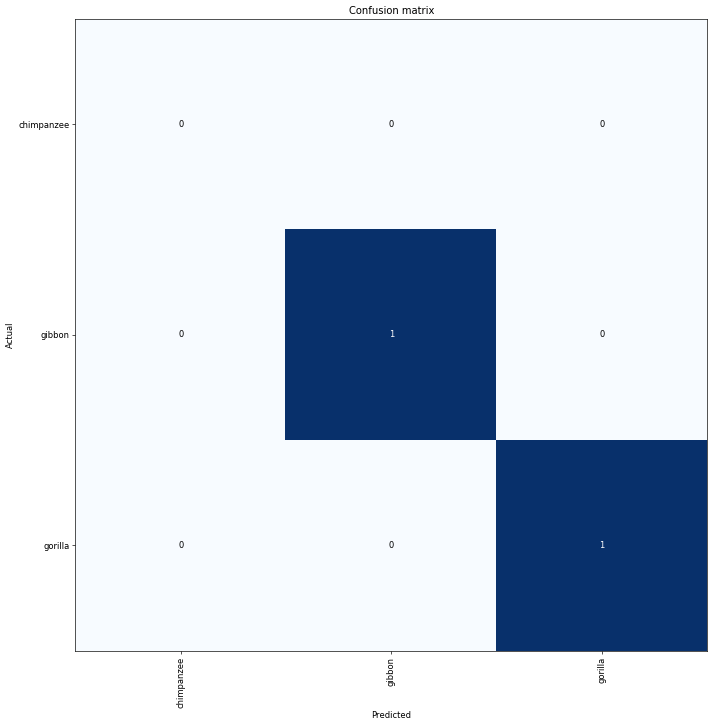

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

AttributeError: 'AxesSubplot' object has no attribute 'flat'

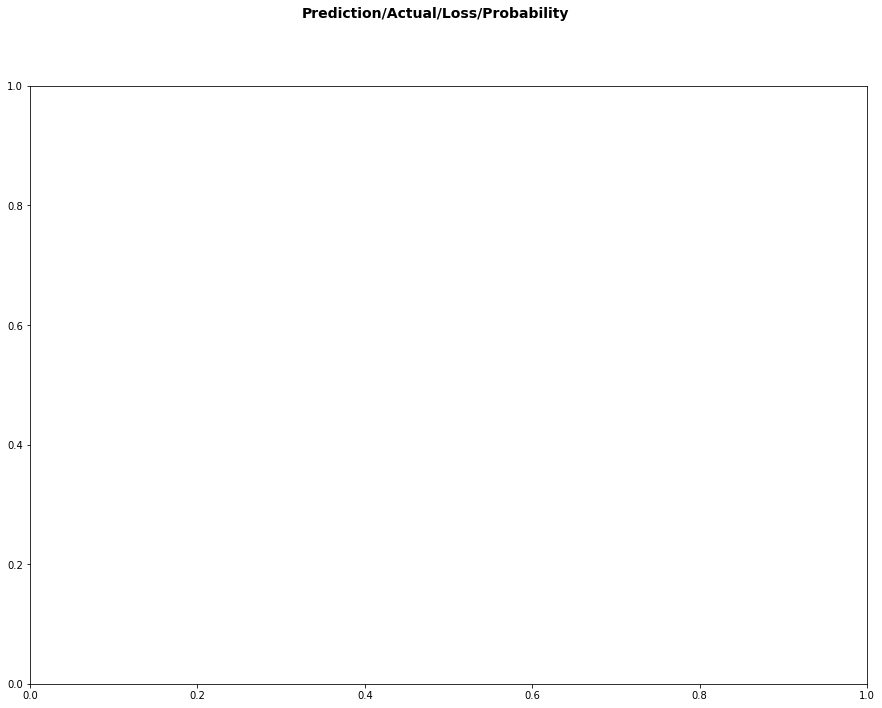

In [13]:
interp.plot_top_losses(1, figsize=(15,11), heatmap=False)

It is a gibbon


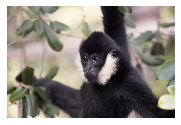

In [27]:
path = './Monkeys Faces/gibbon/' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)